# Homework 4

## Zhongqi Miao
## In collaboration with Jacob Bukoski and Oliver Muellerklein

In [9]:
from time import time
from multiprocessing import Pool
import ipyparallel as ipp

In [108]:
# This should be done globally if we are using ipyparallel I think
c = ipp.Client()

def Throwing(Dart_N, cores):
    from random import uniform
    from math import sqrt
    output = 0
    for i in range(int(Dart_N/cores)):
        x, y = uniform(0, 1), uniform(0,1)
        if sqrt((x - 0.5) ** 2 + (y - 0.5) ** 2) <= 0.5:
            output += 1
    return output

def Parallel(Dart_N, Workers, Mode, Print = True):
    
    Dart_N_inC = 0.0
    
    t_start = time()
    
    if Mode == 'I':
        result = None
        result = c[:].apply_async(Throwing, Dart_N, Workers)
        Dart_N_inC = sum(result.get())
        
    elif Mode == 'M':
        result = []
        with Pool(Workers) as p:
            for i in range(Workers):
                p.apply_async(Throwing, (Dart_N, Workers), callback = lambda x : result.append(x))
            p.close()
            p.join()   
        Dart_N_inC = sum(result)
            
    elif Mode == 'S':
        Dart_N_inC = Throwing(Dart_N, 1)
                
    else:
        raise Exception('Mode not recognized')
        
    t_exe = time() - t_start
    
    pi_app = 4 * Dart_N_inC / float(Dart_N)

    if Print:
        print('Pi Approximation: ', pi_app)
        print('Number of Darts: ', Dart_N)
        print('Execution Time (s): ', t_exe)
        print('Darts Thrown per Second: ', Dart_N / t_exe)
        
    return (t_exe, Dart_N / t_exe)
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
plot_data = []

for i in np.logspace(1, 8, 20):
    plot_data.append([i, Parallel(i, 8, 'S', Print = False)[0], Parallel(i, 8, 'S', Print = False)[1], 
                         Parallel(i, 8, 'M', Print = False)[0], Parallel(i, 8, 'M', Print = False)[1],
                         Parallel(i, 8, 'I', Print = False)[0], Parallel(i, 8, 'I', Print = False)[1]])

In [7]:
# plot_data = pd.DataFrame(data = plot_data, columns = ['DartNumber', 'TimeSingle', 'RateSinge',
#                                                                    'TimeMulti', 'RateMulti',
#                                                                    'TimeIpp', 'RateIpp', ])
# plot_data.to_csv('test.csv')

plot_data = pd.read_csv('test.csv',index_col=0)

plot_data

,DartNumber,TimeSingle,RateSinge,TimeMulti,RateMulti,TimeIpp,RateIpp
0,1.000000e+01,0.000048,5.592405e+05,0.143493,7.205854e+01,0.019470,4.591566e+02
1,2.335721e+01,0.000059,8.987822e+05,0.148715,1.687831e+02,0.022658,1.364485e+03
2,5.455595e+01,0.000091,1.069272e+06,0.160982,3.891681e+02,0.021725,2.745375e+03
3,1.274275e+02,0.000164,1.079737e+06,0.156023,9.584613e+02,0.019991,5.915809e+03
4,2.976351e+02,0.000309,1.097953e+06,0.155160,2.181214e+03,0.021718,1.319772e+04
5,6.951928e+02,0.000665,1.086382e+06,0.191543,4.977637e+03,0.021383,3.654314e+04
6,1.623777e+03,0.001508,1.106877e+06,0.158104,1.172640e+04,0.021582,8.229951e+04
7,3.792690e+03,0.003475,1.079586e+06,0.147224,2.875126e+04,0.021241,1.738166e+05
8,8.858668e+03,0.008373,1.110392e+06,0.153735,6.379470e+04,0.025562,3.784780e+05
9,2.069138e+04,0.019951,9.711619e+05,0.135866,1.499474e+05,0.027202,9.416366e+05


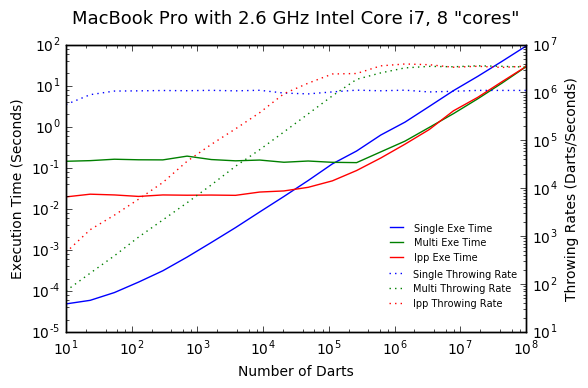

In [47]:
f, ax = plt.subplots()

ax.set_title('MacBook Pro with 2.6 GHz Intel Core i7, 8 "cores"', fontsize=13, y = 1.05)
ax.set_xlabel("Number of Darts", fontsize=10)

ax.set_ylabel("Execution Time (Seconds)", fontsize=10)
t1 = ax.loglog(plot_data['DartNumber'].values, plot_data['TimeSingle'].values, label = 'Single Exe Time')
t2 = ax.loglog(plot_data['DartNumber'].values, plot_data['TimeMulti'].values, label = 'Multi Exe Time')
t3 = ax.loglog(plot_data['DartNumber'].values, plot_data['TimeIpp'].values, label = 'Ipp Exe Time')
ax.legend(prop={'size':7}, frameon=False, bbox_to_anchor = (0.945, 0.41))

ax1 = ax.twinx()
ax1.set_ylabel("Throwing Rates (Darts/Seconds)", fontsize=10)
r1 = ax1.loglog(plot_data['DartNumber'].values, plot_data['RateSinge'].values, label = 'Single Throwing Rate', ls = ':')
r2 = ax1.loglog(plot_data['DartNumber'].values, plot_data['RateMulti'].values, label = 'Multi Throwing Rate', ls = ':')
r3 = ax1.loglog(plot_data['DartNumber'].values, plot_data['RateIpp'].values, label = 'Ipp Throwing Rate', ls = ':')
ax1.legend(prop={'size':7}, frameon=False, bbox_to_anchor = (1.0, 0.25))
